In [ ]:
# Bank Marketing 

# Bank Marketing Subscription Problem
In this notebook, I'll be tackling a marketing problem, where based on the user's information, we'll be trying to predict whether or not they would be interested in the bank's campaign

## Dataset
I'll start by analysing the data set give for this problem.

In [1]:
import pandas as pd
data = pd.read_csv("bank-full.csv", sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.shape

(45211, 17)

We see we have a grand total of 45 thousand elements in our set, with 17 properties, one of them being the outcome for our problem, the rest being the 16 features we have available on each example. We'll now study on the outcome varies over these features

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


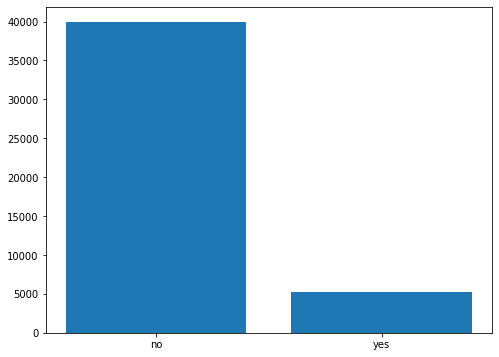

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(8,6))
plt.bar(data.y.unique(), data['y'].value_counts())
plt.show()

In [3]:
def group_by_feature(feature):
  grouped = data.groupby([feature, 'y']).size()
  plt.figure(figsize=(20,6))
  plt.bar(data[feature].unique(), grouped[grouped.index.isin(['no'], level=1)], align='center')
  plt.bar(data[feature].unique(), grouped[grouped.index.isin(['yes'], level=1)], align='center')
  plt.xlabel(feature)
  plt.ylabel("Frequency")
  plt.legend(['no', 'yes'])
  plt.show()


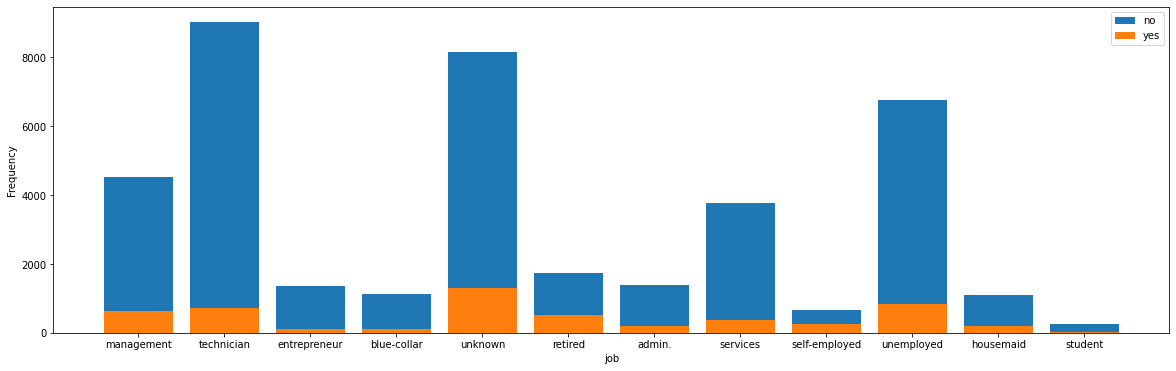

In [ ]:
group_by_feature('job')

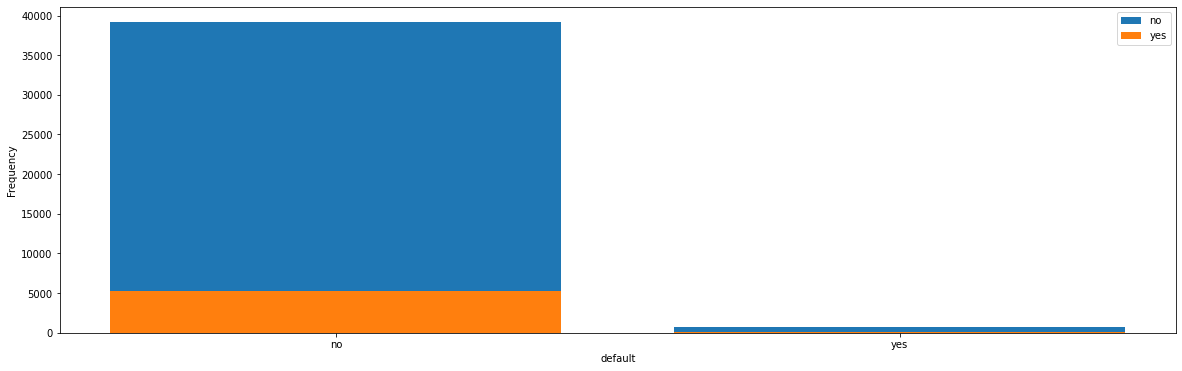

In [ ]:
group_by_feature('default')

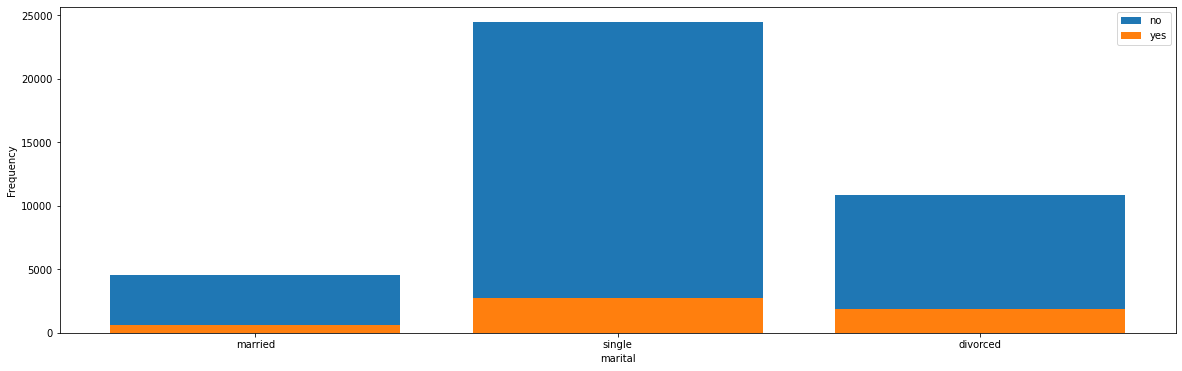

In [ ]:
group_by_feature('marital')

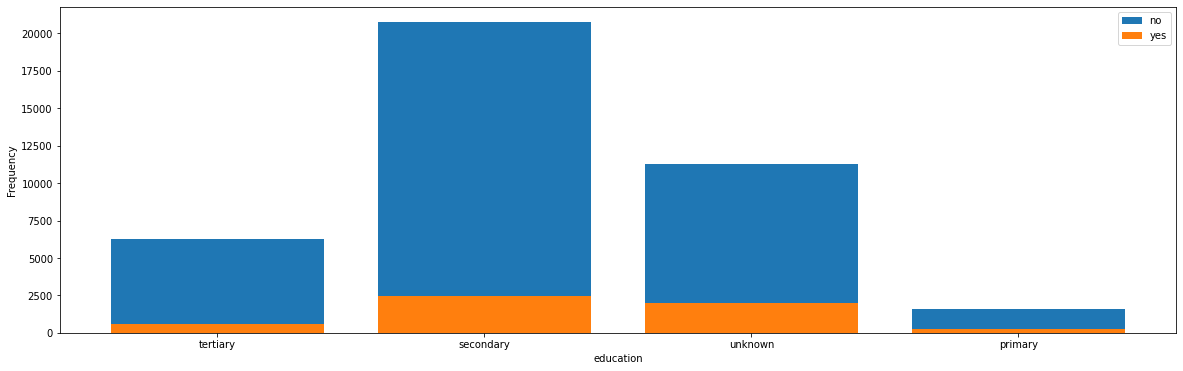

In [ ]:
group_by_feature('education')

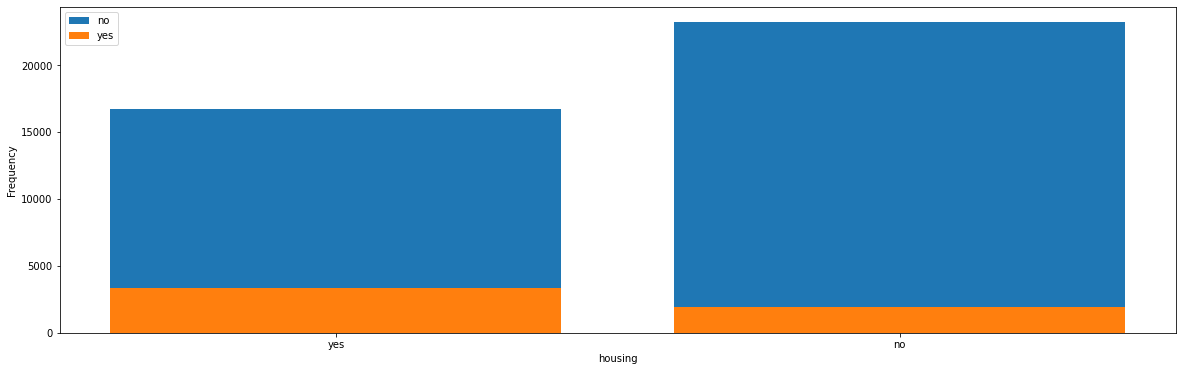

In [ ]:
group_by_feature('housing')

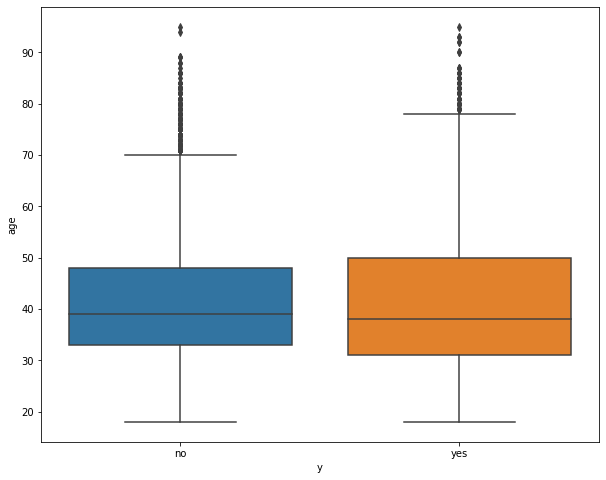

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x="y", y="age")

# Data Pre-processing
Since I am handling both categorical data and numerical data, I have to find a way to ensure both are properly translated to numbers to feed to our machine learning model.

I also have to make sure there are no duplicated rows in the dataset

In [ ]:
data.drop_duplicates()
data.shape

(45211, 17)

In [4]:
from sklearn.model_selection import train_test_split
x_rest, x_test, y_rest, y_test = train_test_split(data.loc[:, data.columns != 'y'], data['y'], test_size=0.2)
x_train, x_cv, y_train, y_cv = train_test_split(x_rest, y_rest, test_size=0.25)

In [5]:
print("Sizes of the sets: ")
print("\tTrain features:", x_train.shape)
print("\tTrain label:", y_train.shape)
print("\tCV features:", x_cv.shape)
print("\tCV label:", y_cv.shape)
print("\tTest features:", x_test.shape)
print("\tTest label:", y_test.shape)

Sizes of the sets: 
	Train features: (27126, 16)
	Train label: (27126,)
	CV features: (9042, 16)
	CV label: (9042,)
	Test features: (9043, 16)
	Test label: (9043,)


In [6]:
# Replace all instances of yes and no to 0's and 1's in the Y column
y_train.replace({'no': 0, 'yes': 1}, inplace=True)
y_cv.replace({'no': 0, 'yes': 1}, inplace=True)
y_test.replace({'no': 0, 'yes': 1}, inplace=True)

In [8]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def preprocess_category(cat, sets):
  for index in range(len(sets)):
    single_set = sets[index]
    categorical_y = pd.get_dummies(single_set[cat], prefix=cat)
    single_set = single_set.drop(cat, axis=1)
    single_set = single_set.join(categorical_y)
    sets[index] = single_set
  return sets
  
x_train, x_cv, x_test = preprocess_category('marital', [x_train, x_cv, x_test])

KeyError: ignored

In [9]:
x_train.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,marital_divorced,marital_married,marital_single
22053,59,entrepreneur,tertiary,no,-23,no,yes,cellular,20,aug,195,7,-1,0,unknown,0,1,0
33563,38,technician,tertiary,no,304,yes,no,cellular,20,apr,8,2,-1,0,unknown,1,0,0
36820,48,blue-collar,secondary,no,574,no,no,cellular,12,may,328,2,-1,0,unknown,0,0,1
24788,53,entrepreneur,unknown,no,2496,no,yes,cellular,18,nov,94,1,-1,0,unknown,0,1,0
10628,46,blue-collar,tertiary,no,993,yes,no,unknown,16,jun,78,1,-1,0,unknown,0,1,0


In [10]:
x_train, x_cv, x_test = preprocess_category('job', [x_train, x_cv, x_test])
x_train, x_cv, x_test = preprocess_category('education', [x_train, x_cv, x_test])
x_train, x_cv, x_test = preprocess_category('default', [x_train, x_cv, x_test])
x_train, x_cv, x_test = preprocess_category('housing', [x_train, x_cv, x_test])
x_train, x_cv, x_test = preprocess_category('loan', [x_train, x_cv, x_test])
x_train, x_cv, x_test = preprocess_category('contact', [x_train, x_cv, x_test])
x_train, x_cv, x_test = preprocess_category('day', [x_train, x_cv, x_test])
x_train, x_cv, x_test = preprocess_category('month', [x_train, x_cv, x_test])
x_train, x_cv, x_test = preprocess_category('poutcome', [x_train, x_cv, x_test])

In [11]:
print("Sizes of the sets: ")
print("\tTrain features:", x_train.shape)
print("\tTrain label:", y_train.shape)
print("\tCV features:", x_cv.shape)
print("\tCV label:", y_cv.shape)
print("\tTest features:", x_test.shape)
print("\tTest label:", y_test.shape)

Sizes of the sets: 
	Train features: (27126, 81)
	Train label: (27126,)
	CV features: (9042, 81)
	CV label: (9042,)
	Test features: (9043, 81)
	Test label: (9043,)


In [12]:
from sklearn import preprocessing
def rescale_numerical_category(cat, sets):
  for index in range(len(sets)):
    single_set = sets[index]
    single_set_mean = single_set[cat].mean()
    single_set[cat] -= single_set_mean
    single_set[cat] /= single_set_mean
    sets[index] = single_set
  return sets

x_train, x_cv, x_test = rescale_numerical_category('balance', [x_train, x_cv, x_test])

In [13]:
x_train, x_cv, x_test = rescale_numerical_category('duration', [x_train, x_cv, x_test])
x_train, x_cv, x_test = rescale_numerical_category('pdays', [x_train, x_cv, x_test])
x_train, x_cv, x_test = rescale_numerical_category('previous', [x_train, x_cv, x_test])
x_train, x_cv, x_test = rescale_numerical_category('campaign', [x_train, x_cv, x_test])
x_train, x_cv, x_test = rescale_numerical_category('age', [x_train, x_cv, x_test])

In [14]:
x_train.head()

,age,balance,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,day_1,day_2,day_3,day_4,day_5,day_6,...,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
22053,0.438795,-1.016742,-0.248651,1.524758,-1.02516,-1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
33563,-0.073318,-0.778712,-0.969175,-0.278641,-1.02516,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
36820,0.170545,-0.582174,0.263808,-0.278641,-1.02516,-1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
24788,0.292477,0.816889,-0.637811,-0.639320,-1.02516,-1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
10628,0.121773,-0.277175,-0.699460,-0.639320,-1.02516,-1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


# Models to Compare

## Linear Regression


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

C_array = [0.001, 0.01, 0.1, 1, 10, 100]
y_train_acc_arr = []
y_cv_acc_arr = []
for c in C_array:

  model = LogisticRegression(class_weight='balanced', C=c)
  model.fit(x_train, y_train)

  y_train_acc = model.score(x_train, y_train)
  y_cv_acc = model.score(x_cv, y_cv)
  y_train_acc_arr.append(y_train_acc)
  y_cv_acc_arr.append(y_cv_acc)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


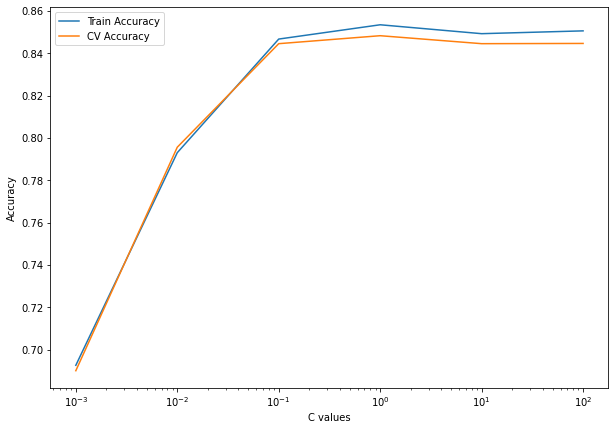

In [ ]:
plt.figure(figsize = (10,7))

plt.plot(C_array, y_train_acc_arr, label='Train Accuracy')
plt.plot(C_array, y_cv_acc_arr, label='CV Accuracy')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.show()


In [ ]:
lin_reg_max_c = C_array[y_cv_acc_arr.index(max(y_cv_acc_arr))]

model = LogisticRegression(class_weight='balanced', C=lin_reg_max_c)
model.fit(x_test, y_test)

y_train_acc = model.score(x_test, y_test)
print("Best C value was", lin_reg_max_c)
print("Best Train accuracy was", max(y_train_acc_arr))
print("Best CV accuracy was", max(y_cv_acc_arr))
print("Best test accuracy was", y_train_acc, "with C =", lin_reg_max_c)

Best C value was 1
Best Train accuracy was 0.8534247585342476
Best CV accuracy was 0.8482636584826366
Best test accuracy was 0.8492756828486122 with C = 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import classification_report
y_test_pred = model.predict(x_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7984
           1       0.43      0.82      0.56      1059

    accuracy                           0.85      9043
   macro avg       0.70      0.84      0.73      9043
weighted avg       0.91      0.85      0.87      9043



## SVM
Now testing with SVM

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1,1, 10], 'gamma': [1,0.1,0.01,0.001] }

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

print(grid.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.01, gamma=1 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. C=0.01, gamma=1, total= 1.9min
[CV] C=0.01, gamma=1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV] .................................. C=0.01, gamma=1, total= 1.9min
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total= 1.9min
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total= 1.9min
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total= 1.9min
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=  28.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=  28.5s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=  28.1s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 100.7min finished


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


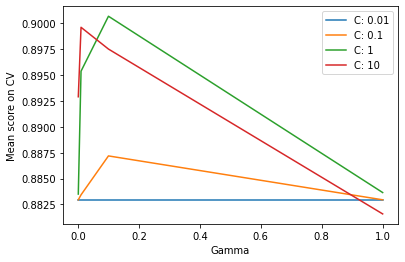

In [19]:
import numpy as np
Gammas = [1,0.1,0.01,0.001]
Cs = [0.01, 0.1,1, 10]

scores = grid.cv_results_["mean_test_score"]
scores = np.array(scores).reshape(len(Cs), len(Gammas))

for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score on CV')
plt.show()

In [22]:
best_svc = grid.best_estimator_
best_svc.fit(x_train, y_train)


NameError: ignored

In [24]:
from sklearn.metrics import classification_report
y_test_pred = best_svc.predict(x_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8002
           1       0.68      0.33      0.44      1041

    accuracy                           0.91      9043
   macro avg       0.80      0.65      0.69      9043
weighted avg       0.89      0.91      0.89      9043



In [26]:
grid.cv_results_["mean_test_score"]

array([0.88295362, 0.88295362, 0.88295362, 0.88295362, 0.88295362,
       0.88719313, 0.88343287, 0.88295362, 0.88365404, 0.90068565,
       0.89537709, 0.88350658, 0.88158956, 0.89751527, 0.89961657,
       0.89290711])